In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import math
%matplotlib inline

### Удельное сопротивление металлов
#### Ось Y

In [6]:
metal_resistivities = """157.3
140.7
147.9
156.2
146.3
157.1
164.8
148.6
154
150.1
146.9
154.6
160.2
147.3
163.9
139.3
155
160.1
164.4
148.6
161.3
149.7
156.4
148.8
153.5
149.9
159.1
168.9
159.7
155.6
159
163.5
145.7
165.8
147.5
163.5
154.6
167.2
162
159.9
143.5
146
166.1
158.8
162.5
145.2
167.5
154.7
161.3
149
161.6
165.1
153.8
151.9
151
143.2
167.5
169.3
145.8
164.7
148.6
149.9
159.4
146.4
150.7
155.6
144
153.1
147.5
148.3
151.1
158.7
163.4
146.7
161.5
159.3
149.8
145.5
162.6
144.5
145.8
144
166.5
163.5
164.1
159
148.3
139.9
157.1
150.8
157
172.4
162.7
163.8
151.4
155.3""".split("\n")
metal_resistivities = list(map(float, metal_resistivities))

### Температура сплава

#### Ось X

In [7]:
metal_temperatures = """80.9
86.9
74.4
73.4
80.7
81.4
81
83.7
84.3
81
86.5
84.1
70.6
79.4
79.9
89.2
70.9
73.2
69
80
82.3
73
72.3
75.1
71.3
84.2
71.9
66.2
69.5
81.2
75.8
69.6
84.6
72.1
87.4
73.9
73.5
68.6
77.7
76.2
84.4
79.9
66.9
75.2
75.6
83.4
67.2
82.6
75.4
80.8
74.7
74.8
74.3
82.7
85.4
84.6
70.9
67.3
86.2
68.7
81.1
84.6
75.3
88.9
83.9
74.3
84.1
77.6
87.9
76.1
77.5
83.6
78.9
83.3
77.1
72.2
79.5
79.2
72.9
85
81.8
82
71.2
83.2
71.4
69.2
88.9
88.5
81.5
85
77.1
65
83.7
71.5
75.8
86.3""".split("\n")
metal_temperatures = list(map(float, metal_temperatures))

#### Изображаем эллипс рассеяния

C:\Users\Vitaly\AppData\Local\Temp\ipykernel_23588\892959689.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


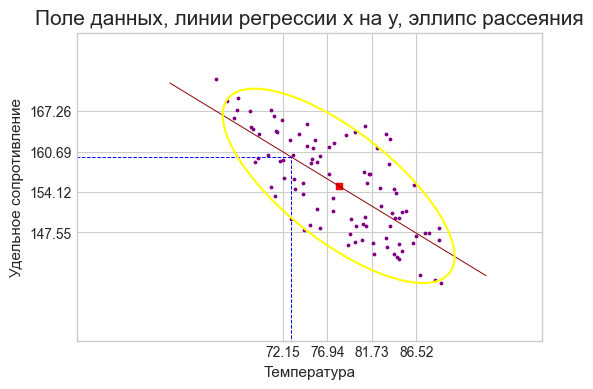

In [8]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(6, 4)) # расширение графика
ax = plt.axes()

plt.title('Поле данных, линии регрессии x на y, эллипс рассеяния', fontsize=15)
ax.set_xlabel('Температура', fontsize = 11)
ax.set_ylabel('Удельное сопротивление', fontsize = 11)

x = np.array(metal_temperatures)
x = np.append(x, [94, 60]) # добавили значения чуть меньше min и чуть больше max, чтобы красная линия тренда была чуть больше
# распределения
ax.scatter(metal_temperatures, metal_resistivities, s = 3, color = 'purple')

# Изображаем пунктирные линии к точке прогноза признака X по значению Y:
beta = -0.920046163
alpha = 227.0281913

def line(x):
    return beta * x + alpha

ax.plot([60.0, 94.0], [line(60.0), line(94.0)], 'darkred', linewidth = 0.7) # линия тренда
ax.plot([73, 0], [159.8648214, 159.8648214], 'blue', linewidth = 0.7, ls = '--') # горизонтальная ось
ax.plot([73, 73], [line(159.8648214), 159.8648214], 'blue', linewidth = 0.7, ls = '--') # вертикальная ось
plt.axis(xmin = 50, xmax = 100, ymin = 130, ymax = 180) # лимит для осей
plt.xticks([72.15, 76.94, 81.73, 86.52]) # риска на оси X
plt.yticks([147.55, 154.12, 160.69, 167.26]) # риска на оси Y

# Изображаем эллипс
korr = -0.7268523325769483 # коэф корреляции
st_x = 7.889058601254974 # станд. отклон для выборки X
st_y = 6.232492320598221 # станд. отклон для выборки Y
y_a = 78.15625 # мат. ожидание для выборки Y
x_a = 155.12083333333334 # мат. ожид для выборки X

# уравнение верхней половина эллипса
equation_plus = [(x, x_a + korr * st_x/st_y * (x - y_a) + st_x / st_y * math.sqrt(1 - korr**2) * math.sqrt(4 * st_y**2 - (x - y_a)**2)) for x in np.arange(y_a - 2 * st_y, y_a + 2 * st_y, 0.0001)]
# уравнение нижней половины эллипса
equation_minux = [(x, x_a + korr * st_x/st_y * (x - y_a) - st_x / st_y * math.sqrt(1 - korr**2) * math.sqrt(4 * st_y**2 - (x - y_a)**2)) for x in np.arange(y_a - 2 * st_y, y_a + 2 * st_y, 0.0001)]

sns.lineplot(x = [x for x, y in equation_plus], y = [y for x, y in equation_plus], color='yellow') # верхняя половина эллипса
sns.lineplot(x = [x for x, y in equation_minux], y = [y for x, y in equation_minux], color='yellow') # нижняя половина эллипса

ax.scatter([y_a], [x_a], color = 'red', s = 22, marker = 's') # центр данных

# plt.savefig('Эллипс рассеяния.png')
plt.show()

In [9]:
# print(y_plus(x_range))

#### Для прикола

C:\Users\Vitaly\AppData\Local\Temp\ipykernel_23588\2694400868.py:6: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ells = [Ellipse((1, 1), 4, 2, a) for a in angles]


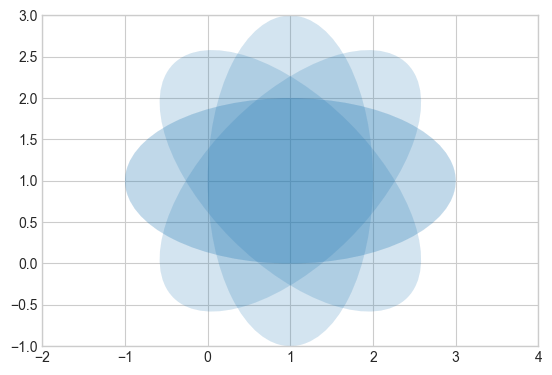

In [10]:
from matplotlib.patches import Ellipse

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()